## Twitter - US Airline Sentiment Analysis

## Table of Contents
1. **[Introduction](#introduction)**
2. **[Data Understanding](#data_understanding)**
3. **[EDA (Exploratory Data Analysis)](#eda)**
7. **[Data Preparation](#data_preparation)**
8. **[Modelling](#modelling)**
    - **[Support Vector Machine](#svm)**
    - **[Random Forest](#rf)**
    - **[AdaBoost Classifier](#ab)**
11. **[Conclusion](#conclusion)**

<a id='introduction'></a>

## Introduction

Twitter data was scraped from February of 2015 for six US airlines and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons.

<a id='data_understanding'></a>

## Data Understanding

In [1]:
# Import important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set working directory
os.chdir(r"E:\PGP BA - greatlearning\GitHub\Twitter - US Airline Sentiment Analysis")

In [3]:
# Read the data
tweets = pd.read_csv("Tweets.csv")

In [4]:
# Check head of data
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Check data type of variables
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


<a id='eda'></a>

## EDA (Exploratory Data Analysis)

In [6]:
# Summary of numerical variables
tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
# Summary of categorical variables
tweets.describe(include="O")

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,14247,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,5,157,3744


- Most of the airline sentiment in the tweets are negative.
- **Customer Service Issue** is the top most reason for negative sentiments.

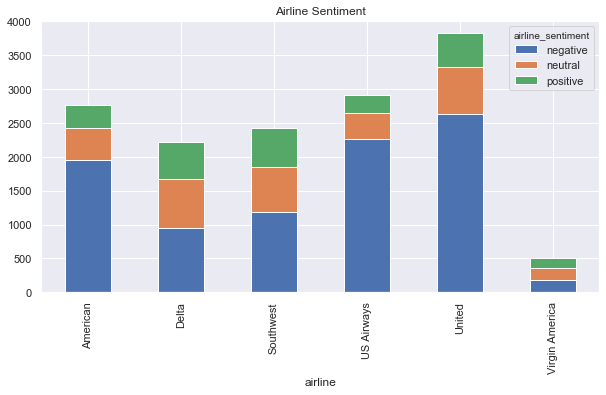

In [8]:
# Check number of tweets for different Airlines with sentiments
sentiment = pd.crosstab(index=tweets["airline"], columns=tweets["airline_sentiment"])
sentiment.plot(kind="bar", stacked=True, figsize=(10,5), title="Airline Sentiment")
plt.show()

- Maximum tweets are for **United** airline and least no. of tweets are for **Virgin America**.

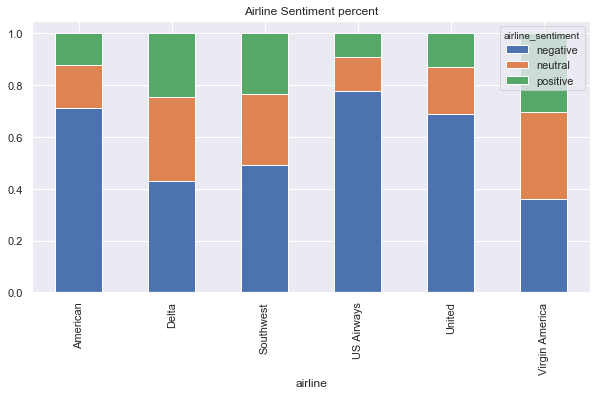

In [9]:
# Check percent of tweets for different Airlines with sentiments
sentiment_percent = pd.crosstab(index=tweets["airline"], columns=tweets["airline_sentiment"], normalize="index")
sentiment_percent.plot(kind="bar", stacked=True, figsize=(10,5), title="Airline Sentiment percent")
plt.show()

- For **Delta** and **Virgin America** tweet ratio is almost same for negative, neutral & positive.
- For all other airlines negative tweets are more, **US Airways** being the highest among them with around 78% of netative tweets.

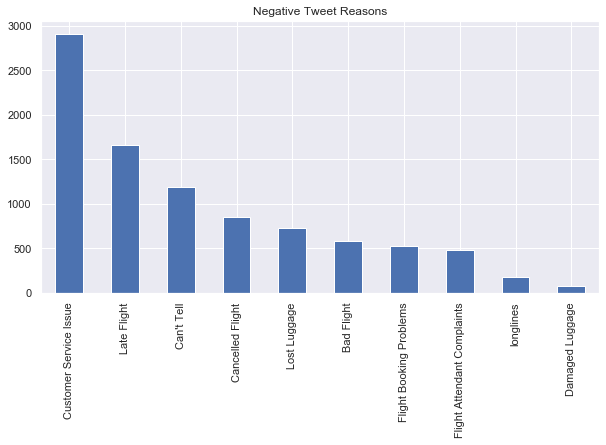

In [10]:
# Check reasons for negative tweet
negative_reason = tweets["negativereason"].value_counts()
negative_reason.plot(kind="bar", figsize=(10,5), title="Negative Tweet Reasons")
plt.show()

- Top 3 reasons for negative tweets are:
 1. **Customer Service Issue**
 2. **Late Flight**
 3. **Cancelled Flight**

In [11]:
# Check negative reasons count in different Airlines
sentiment = pd.crosstab(index=tweets["airline"], columns=tweets["negativereason"], normalize="index")
sentiment

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,0.044388,0.101020,0.125510,0.391837,0.006122,0.044388,0.066327,0.127041,0.076020,0.017347
Delta,0.067016,0.194764,0.053403,0.208377,0.011518,0.062827,0.046073,0.281675,0.059686,0.014660
Southwest,0.075885,0.134064,0.136594,0.329680,0.011804,0.032040,0.051433,0.128162,0.075885,0.024452
US Airways,0.045957,0.108705,0.083517,0.358374,0.004861,0.054353,0.053911,0.200177,0.068051,0.022095
United,0.082036,0.143942,0.068743,0.258640,0.008355,0.063806,0.054690,0.199392,0.102165,0.018230
Virgin America,0.104972,0.121547,0.099448,0.331492,0.022099,0.027624,0.154696,0.093923,0.027624,0.016575


- Top most reason for each airlines negative tweets are:
 1. **American** - Customer Service Issue
 2. **Delta** - Late Flight
 3. **Southwest** - Customer Service Issue
 4. **US Airways** - Customer Service Issue
 5. **United** - Customer Service Issue
 6. **Virgin America** - Customer Service Issue

<a id='data_preparation'></a>

## Data Preparation

In [12]:
# Get important columns for data preparation and modelling
data = tweets[["airline_sentiment","text","airline","retweet_count"]]

In [13]:
data.head()

,airline_sentiment,text,airline,retweet_count
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America,0
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America,0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America,0
4,negative,@VirginAmerica and it's a really big bad thing...,Virgin America,0


In [14]:
# Change airline_sentiment to numeric
# negative = 0
# neutral = 1
# positive = 2
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["airline_sentiment"] = encoder.fit_transform(data["airline_sentiment"])
print(encoder.classes_)
data.head()

['negative' 'neutral' 'positive']


,airline_sentiment,text,airline,retweet_count
0,1,@VirginAmerica What @dhepburn said.,Virgin America,0
1,2,@VirginAmerica plus you've added commercials t...,Virgin America,0
2,1,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0
3,0,@VirginAmerica it's really aggressive to blast...,Virgin America,0
4,0,@VirginAmerica and it's a really big bad thing...,Virgin America,0


In [15]:
# Do dummy coding for airline
airline_dummy = pd.get_dummies(data["airline"], drop_first=True, prefix="airline")
airline_dummy.head()

,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [16]:
# Normalize retweet_count
from sklearn.preprocessing import normalize
X = np.array(data["retweet_count"])
X = X.reshape(-1,1)
retweet_normal = normalize(X)

In [17]:
# Import libraries for text data processing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [18]:
data["text"]

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [19]:
# Do text cleaning
wordnet = WordNetLemmatizer()
corpus = []
for i in range(len(data)):
    review = re.sub("[^a-zA-Z]", " ", data["text"][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)
    

In [20]:
# Check cleaned text
corpus[0:5]

['virginamerica dhepburn said',
 'virginamerica plus added commercial experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing']

In [21]:
# Create TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [22]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# Create final data set for modelling
model_data = pd.concat([data["airline_sentiment"],pd.DataFrame(X), pd.DataFrame(airline_dummy), pd.DataFrame(retweet_normal)], axis=1)
model_data.head()

,airline_sentiment,0,1,2,3,4,5,6,7,8,...,12568,12569,12570,12571,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,0
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0.0


In [24]:
# Create dataset for sentiment and tweets text
from wordcloud import WordCloud,STOPWORDS
corpus_df = pd.DataFrame(corpus, columns=["corpus"])
df = pd.concat([tweets["airline_sentiment"], corpus_df], axis=1)
df.head()

,airline_sentiment,corpus
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


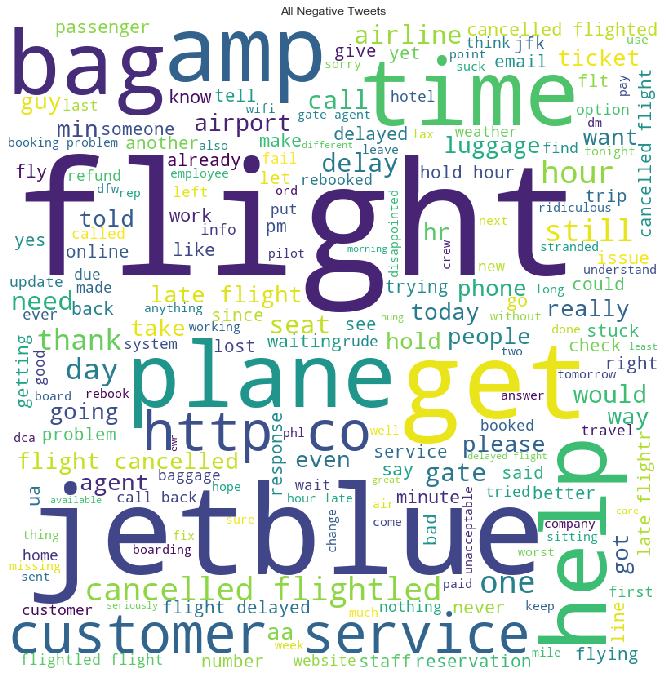

In [25]:
# Check wordcloud for negative tweets
df_negative = df[df["airline_sentiment"]=="negative"]["corpus"]
comments_negative = " ".join(df_negative)
wordcloud = WordCloud(stopwords=STOPWORDS and ['virginamerica', 'united', 'southwest', 'delta', 'usairways','american', 'americanair', 'southwestair'], 
                      height=800, width=800, 
                      background_color="white",
                      min_font_size=12).generate(comments_negative)

# Plot wordcloud image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title("All Negative Tweets")
plt.axis("off")
plt.show()

- Most important words used in negative tweets and which are of our interest are **jetblue**, **customer service** & **cancelled flight**

<a id='modelling'></a>

## Modelling

In [26]:
# Split train and test data
from sklearn.model_selection import train_test_split
x = model_data.drop(["airline_sentiment"], axis=1)
y = model_data["airline_sentiment"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 123)
print("Train :",x_train.shape)
print("Test  :",x_test.shape)

Train : (11712, 12578)
Test  : (2928, 12578)


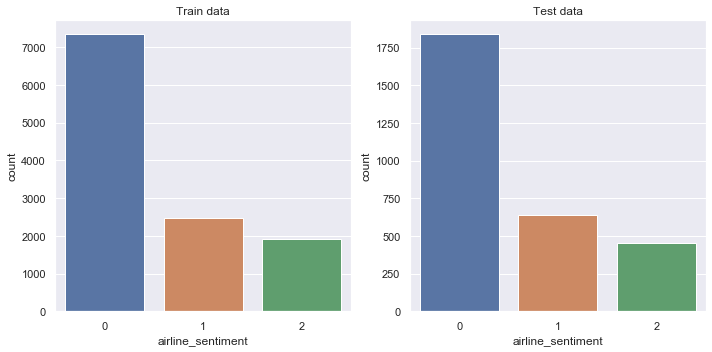

In [27]:
# Check class distribution
plt.subplots(figsize=(10,5), tight_layout=True)
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("Train data")
plt.subplot(1,2,2)
sns.countplot(y_test)
plt.title("Test data")
plt.show()

<a id='svm'></a>

## Support Vector Machine

In [28]:
# import SVM classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
# Predict on test data
pred_svc = svc.predict(x_test)

In [30]:
# Check Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_svc = accuracy_score(y_test, pred_svc)
f1_svc = f1_score(y_test, pred_svc, average="micro")

print("Accuracy :" ,accuracy_svc)
print("F1 Score :" ,f1_svc)

Accuracy : 0.6280737704918032
F1 Score : 0.6280737704918032


- Prediction accuracy for **SVM classifier** on test data is **62%** which is not so great score.

<a id='rf'></a>

## Random Forest

In [31]:
# Run Random Forest classifer with class_weight="balanced" & 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [32]:
# Predict on train data
pred_rf_train = rf.predict(x_train)

In [33]:
# Check Accuracy on train data
accuracy_rf_train = accuracy_score(y_train, pred_rf_train)
f1_rf_train = f1_score(y_train, pred_rf_train, average="micro")

print("Accuracy :" ,accuracy_rf_train)
print("F1 Score :" ,f1_rf_train)

Accuracy : 0.9953893442622951
F1 Score : 0.9953893442622951


In [34]:
# Predict on test data
pred_rf = rf.predict(x_test)

In [35]:
# Check Accuracy on test data
accuracy_rf = accuracy_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf, average="micro")

print("Accuracy :" ,accuracy_rf)
print("F1 Score :" ,f1_rf)

Accuracy : 0.7701502732240437
F1 Score : 0.7701502732240437


- Prediction accuracy of **Random Forest** with 100 trees & class_weight="balanced" in train data is **99%** and in test data is **77%** which is a good score.

In [36]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print(conf_matrix)

[[1717   91   31]
 [ 317  289   32]
 [ 137   65  249]]


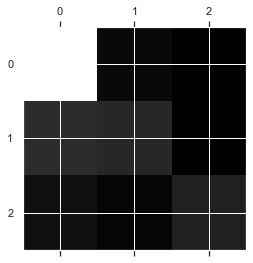

In [37]:
# Check each class prediction map
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

- Class 0 (negative sentiment) is white which means it was predicted well.
- Diagonal is white or grey which shows most of the predictions were right.
- Box of actual 1 and predicted 0 is also grey which means some of the neutral sentiments were predicted as negative.

<a id='ab'></a>

## AdaBoost Classifier

In [38]:
# Run Adaboost classifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=1)
Adaboost = AdaBoostClassifier(base_estimator=model, n_estimators=500, learning_rate=.5, algorithm="SAMME.R")
ab = Adaboost.fit(x_train, y_train)

In [39]:
# Predict on test data
pred_ab = ab.predict(x_test)

In [40]:
# Check Accuracy
accuracy_ab = accuracy_score(y_test, pred_ab)
f1_ab = f1_score(y_test, pred_ab, average="micro")

print("Accuracy :" ,accuracy_ab)
print("F1 Score :" ,f1_ab)

Accuracy : 0.7674180327868853
F1 Score : 0.7674180327868851


- Prediction accuracy for **AdaBoost classifier** on test data is **76.7%** which is a good score.

<a id='conclusion'></a>

## Conclusion

- **Random Forest** and **AdaBoost classifier** accuracy is almost same which is **77%**.
- Most of the negative sentiments were predicted right by the model
- **Customer Service Issue** is the top most reason for negative tweets for all the airlines except **Delta**, for which **Late Flight** is the reason.